# **Plotting residuals for the new solver (with fvc term)**

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
model = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
solverInfo_path = [run + 'turbulentFlatPlate_withfvc_vol/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.068462,3,1.000000,0.069000,2,False,GAMG,1.000000,0.088196,13,True
1,2,smoothSolver,0.174062,0.013640,3,0.152844,0.013708,2,False,GAMG,0.002984,0.000249,5,True
2,3,smoothSolver,0.056973,0.005517,4,0.087197,0.005806,3,False,GAMG,0.004875,0.000342,5,True
3,4,smoothSolver,0.033011,0.002713,5,0.054833,0.005411,2,False,GAMG,0.006688,0.000516,3,True
4,5,smoothSolver,0.023739,0.002235,5,0.043742,0.004243,2,False,GAMG,0.007034,0.000689,3,True


In [4]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

## Plot

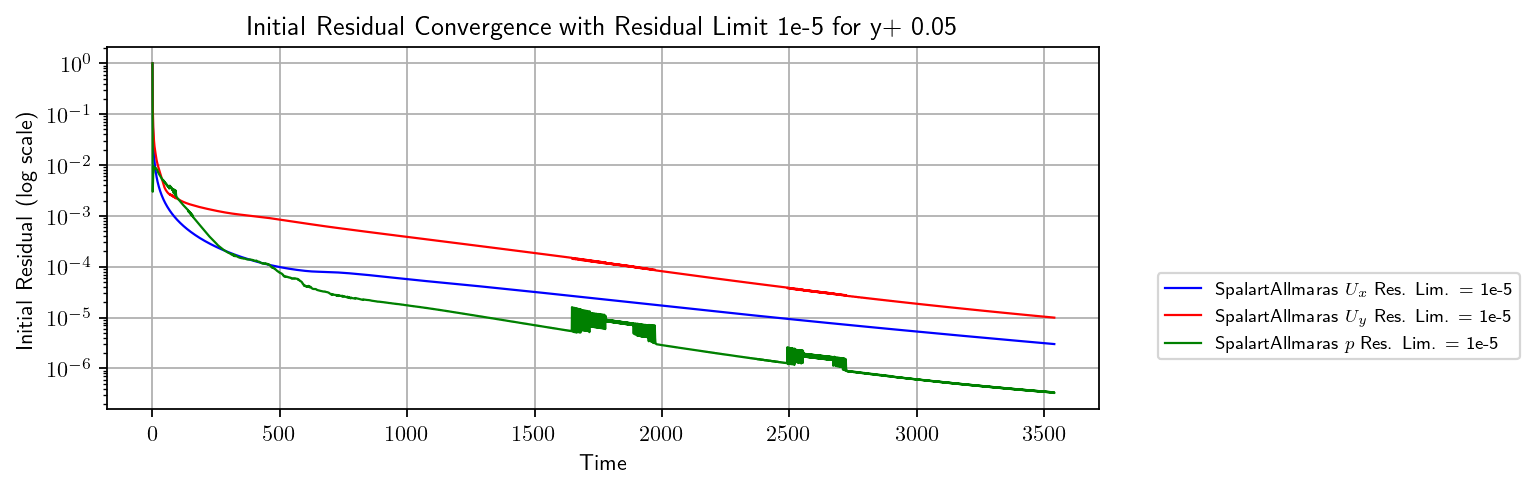

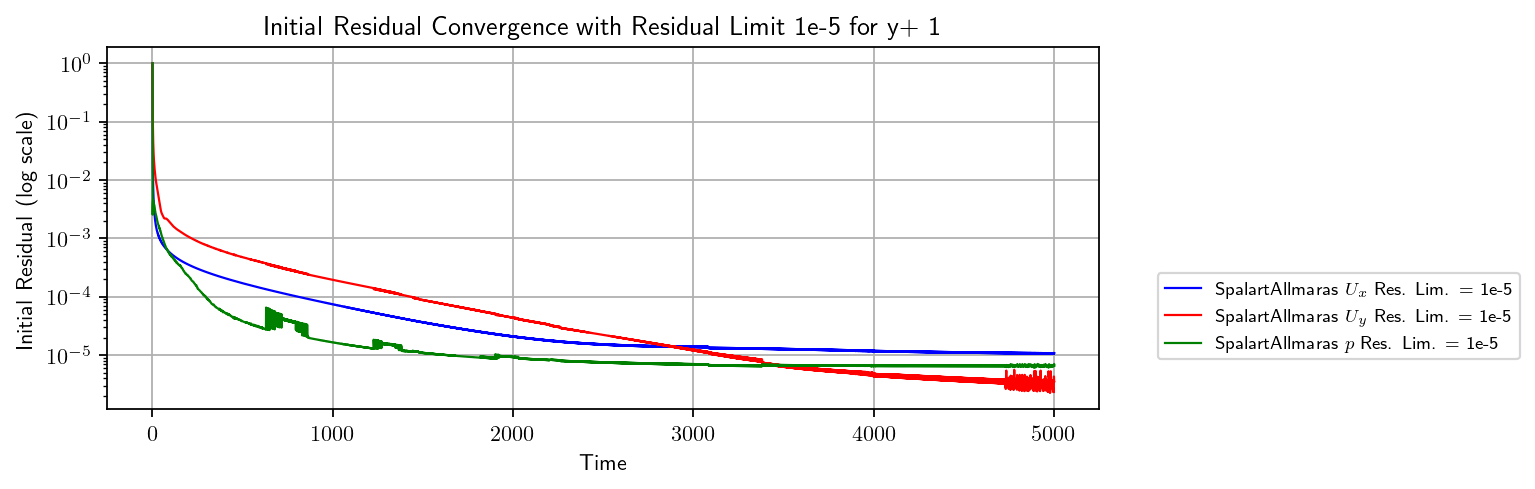

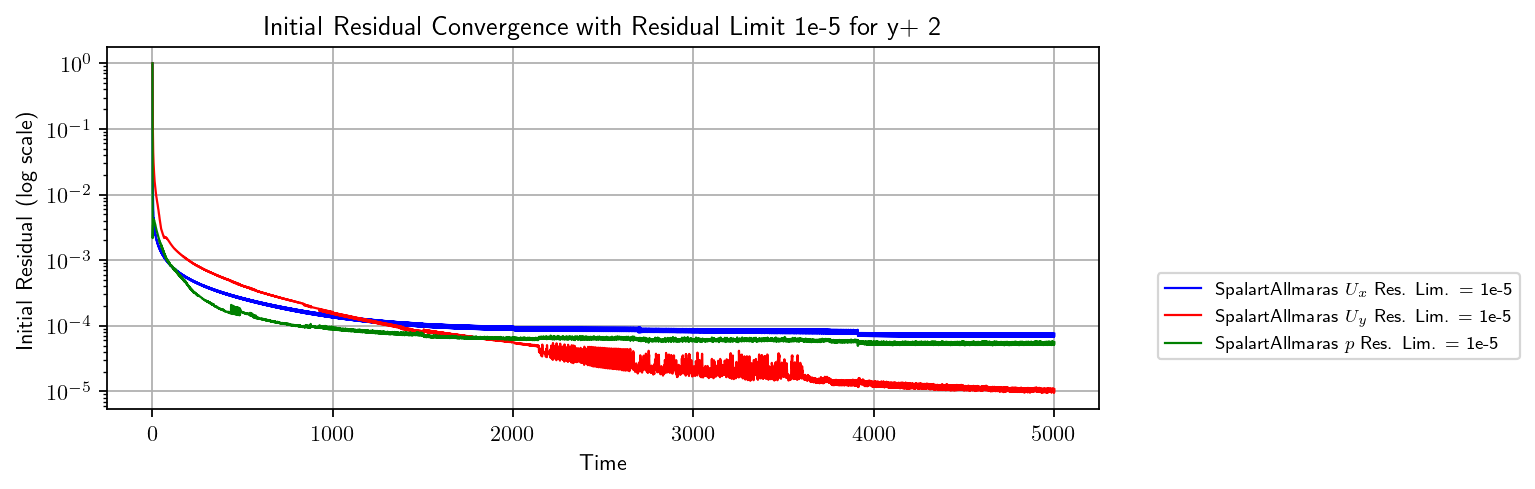

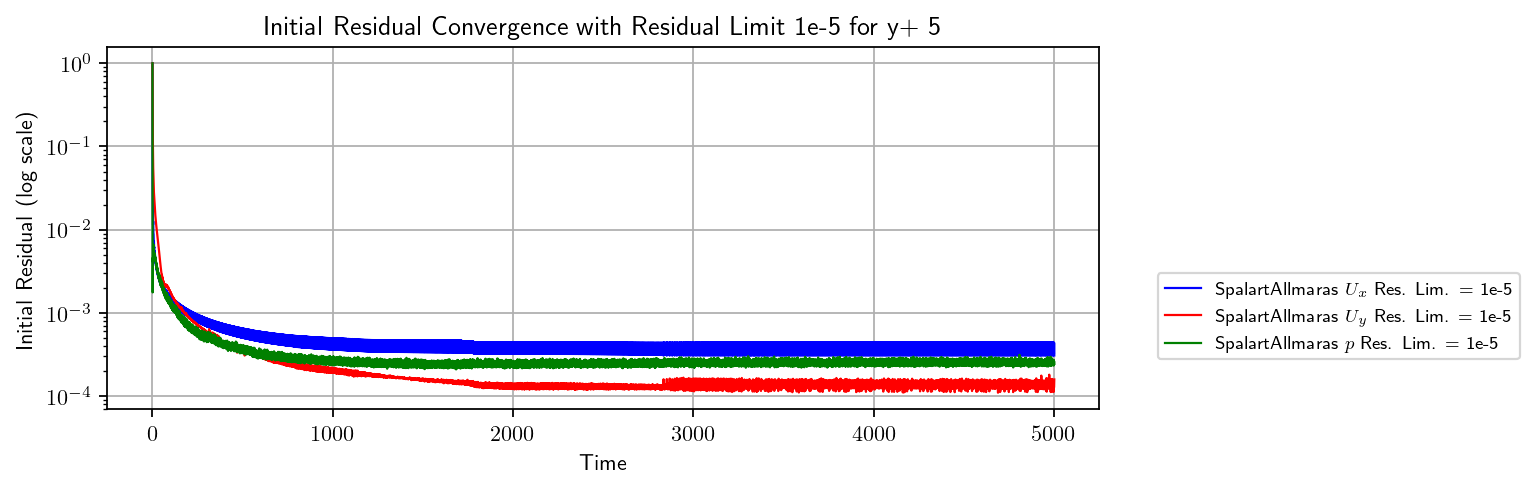

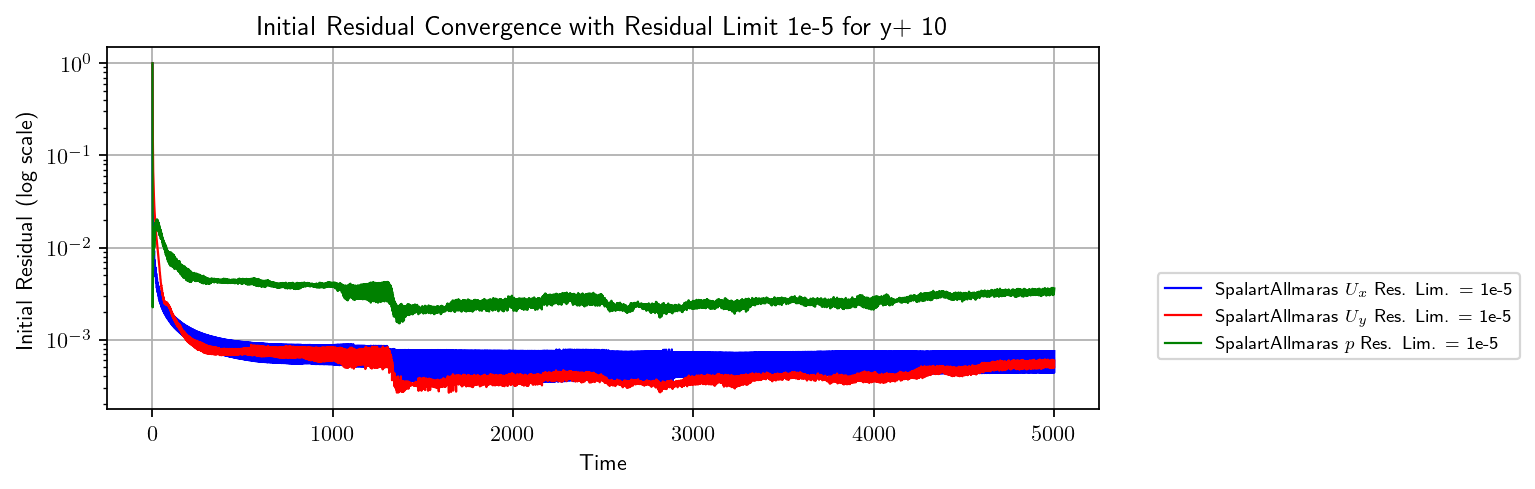

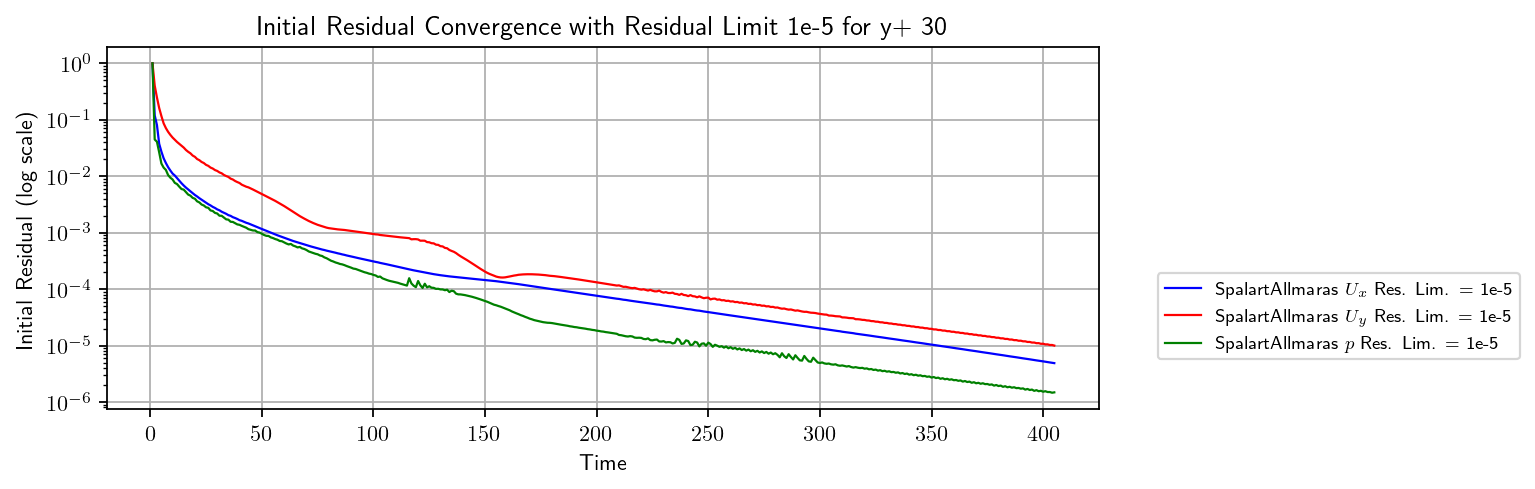

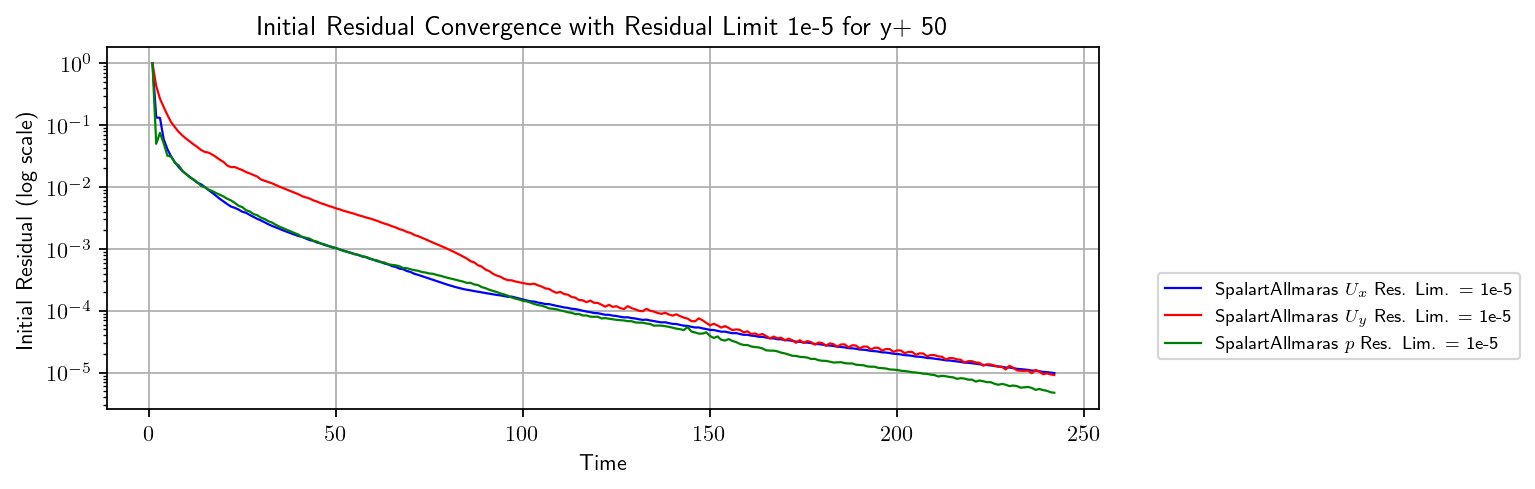

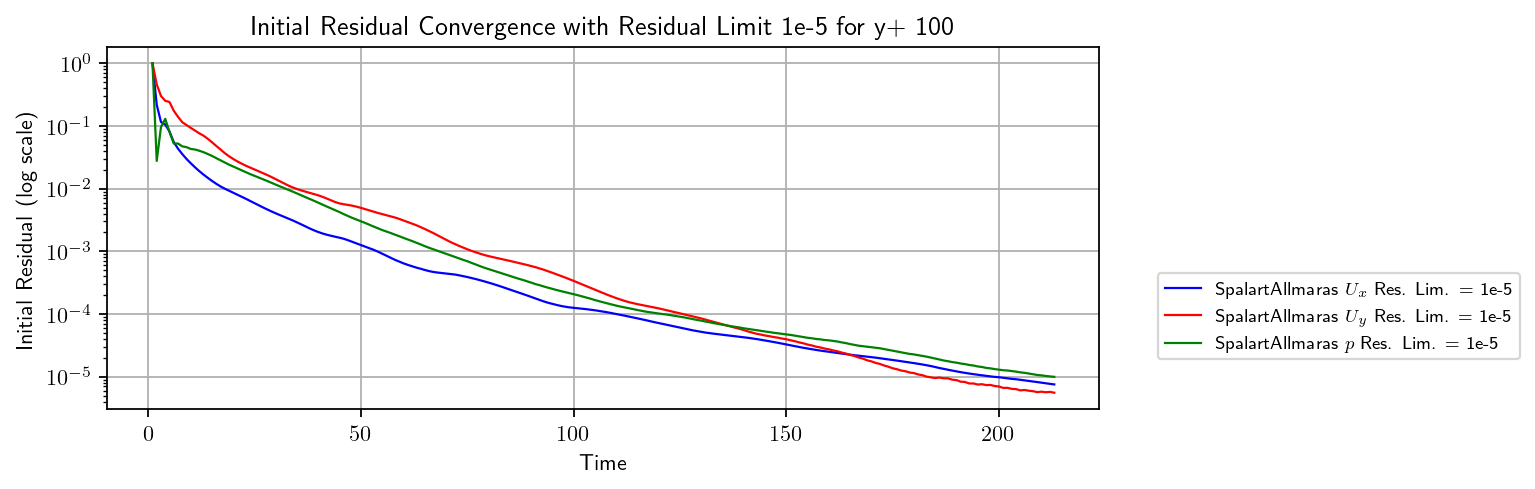

In [5]:
lw = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence with Residual Limit {} for y+ {}".format(res_list[i], yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.4))        